# Prepare Data


What is it? 
- the stage after acquiring our data that ensures our data is ready for exploration and eventually modeling

- Pipeline: Plan - Acquire - **Prepare** - Explore - Model - Deliver


Why do we care?
- because we need our data to be tidy and clean for accurate exploration
- because we need our data split to be able to adaquately evaluate our model 


How do we do it?
- start with one dataframe from acquire
1. summarize the data
2. clean the data
3. split the data: train, validate, and test
- end with `prepare.py` file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our own acquire module
import acquire

## This Lesson - Titanic Dataset

Project goal: predict who survived the titanic

## Acquire 

- use my `acquire.py` since i've already established this step

In [ ]:
# get titanic data


In [ ]:
#look at data


## Prepare

## STEP 1: Summarize

- understand your data
- visualize your variables (univariate only)

#### understand your data

In [ ]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values


Do we know what all the columns mean? 
- passenger_id: 
- survived:
- pclass:
- sex: 
- age:
- sibsp:
- parch:
- fare: 
- embarked:
- class:
- deck:
- embarked_town:
- alone:

What does one row of data respresent? 
- ?

What is our target variable? 
- ?

#### visualize your data (univariate)

In [ ]:
#find numeric columns


In [ ]:
#plot distributions of numeric columns


In [ ]:
#get string columns


In [ ]:
#plot distributions of string columns


# STEP 2: Clean the data

- take care of duplicates
- verify datatypes
- handle nulls
- consider outliers
- for modeling: make all columns numeric

Note: there are other things to consider in the prepare phase that we will talk about in future methodologies

### Duplicate Data

In [ ]:
#look at data


#### are there any duplicates in passenger_id?

#### embarked and embark_town columns

In [ ]:
#view counts across both


In [ ]:
#drop unnecessary column


In [ ]:
#verify


#### pclass and class columns

In [ ]:
#view counts across both


**Note:** The machine learning models can only accept numeric values. Therefore, we will remove the class column instead the pclass column.

In [ ]:
#drop unnecessary column


### Verify Datatypes

### Handle Nulls

some options
- delete all nulls rows
- delete that column
- fill with a median value (numeric columns) 
- fill with the mode (string columns)
- fill with with 0

Note: not all these answers will make sense for your column!!

In [ ]:
#find were null values are


In [ ]:
#isolate nulls values


#### age

In [ ]:
#check counts


In [ ]:
#check percentage


In [ ]:
#plot it


- there doesnt seem like an appropriate value to replace
- we will delete the entire column, for now
- with more time, i might come back and see if there is a way to keep the age column 

In [ ]:
#drop


In [ ]:
#verify 


#### deck

- there are way too much null values
- will definitely delete this column

#### embark_town

In [ ]:
#look at embark_town value counts with nulls


We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function

In [ ]:
#fill it!


In [ ]:
#verify


### Outliers

options
- keep 
- remove
- stretch/compress

There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

### For Modeling: Make all columns numeric (encode)
- machine learning models only work with numeric values

#### Therefore, we have to Encode!

- Encoding -- turning a string into a number


Two strategies:
- label encoding -- associate each unique value with a number
    - use the label encoder when the categories have an inherit order
- one-hot encoding (get_dummies) -- turn each unique value into a separate column with either 1 or 0
    - use one-hot encoding when there is no order 

*Note: Curse of dimensionality*
- An increase in the dimensions can, in theory, add more information to the data thereby improving the quality of data but practically increases the noise and redundancy during its analysis
- An increase in dimensionality it implies an increase in the number of features

also known as Hughes phenomenon: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pcJdd2y924Xk61SXa7uYpw.jpeg

#### one-hot encoding
- `pd.get_dummies`
- get dummy vars for both sex and embark_town columns

In [ ]:
#look at sex data


In [ ]:
#use get_dummies on sex data


In [ ]:
#drop first column


In [ ]:
# create dummy variables for 'sex' and 'embark_town'


In [ ]:
# concatenate the dummy_df dataframe above with the original df and validate.


> i will keep my string values in my dataframe for now. as i will need them for exploration. 

### Now that everything is clean, lets make a function!

In [ ]:
# def clean_titanic(df):
#     '''
#     This function will clean the the titanic dataset
#     '''
#     df = df.drop(columns =['embarked','class','age','deck'])

#     df.embark_town = df.embark_town.fillna(value='Southampton')

#     dummy_df = pd.get_dummies(df[['sex','embark_town']], drop_first=True)
#     df = pd.concat([df, dummy_df], axis=1)
#     return df

Testing that the function does what we intend for it to do:

In [ ]:
#acquire fresh copy of titanic function


In [ ]:
#use clean function


# Step 3: Splitting

- Start with single dataframe
- End with three dataframes: train, validate, test
    - **train:** data to explore, clean, scale, and fit 
    - **validate, test:** represents unseen data
        - **validate:** confirm our top models have not overfit
        - **test:** test our top model -- ONLY USED ON 1 MODEL!

To accomplish this
- do two splits using sklean 
- train dataset should be the bulk of the dataframe ~60%
- validate should be about ~20%
- test should be about ~20%

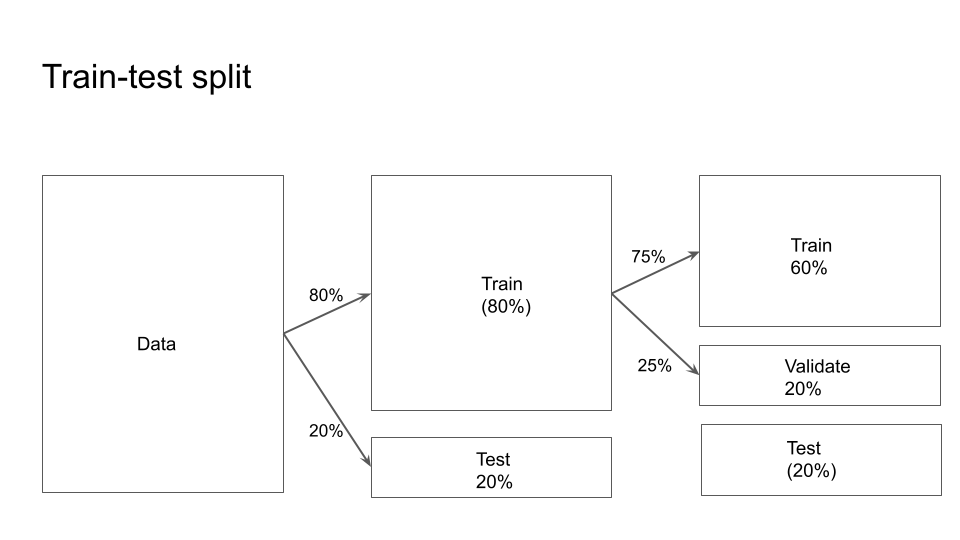

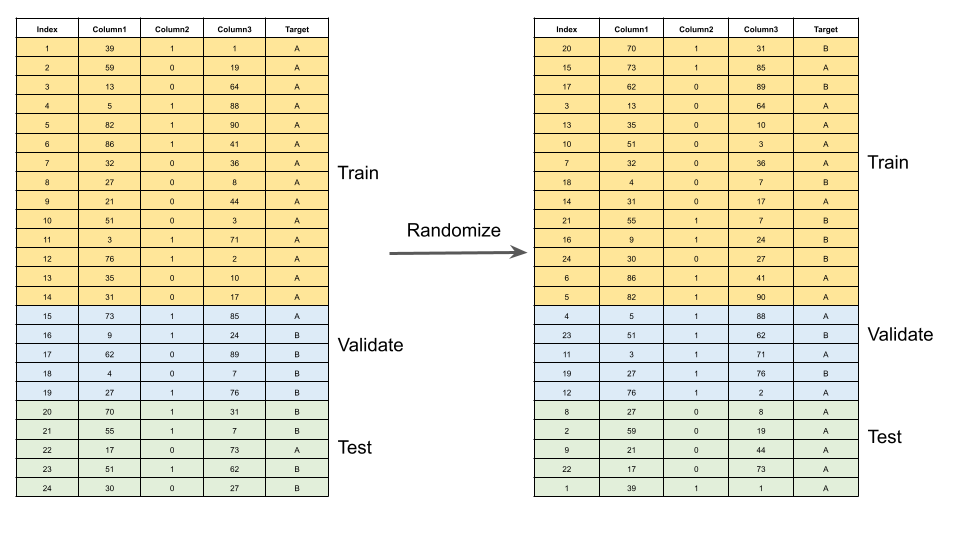

Our target variable contains A and B. Notice how many B values made it into the train dataset. 

Let's correct this by stratifing on our target variable.

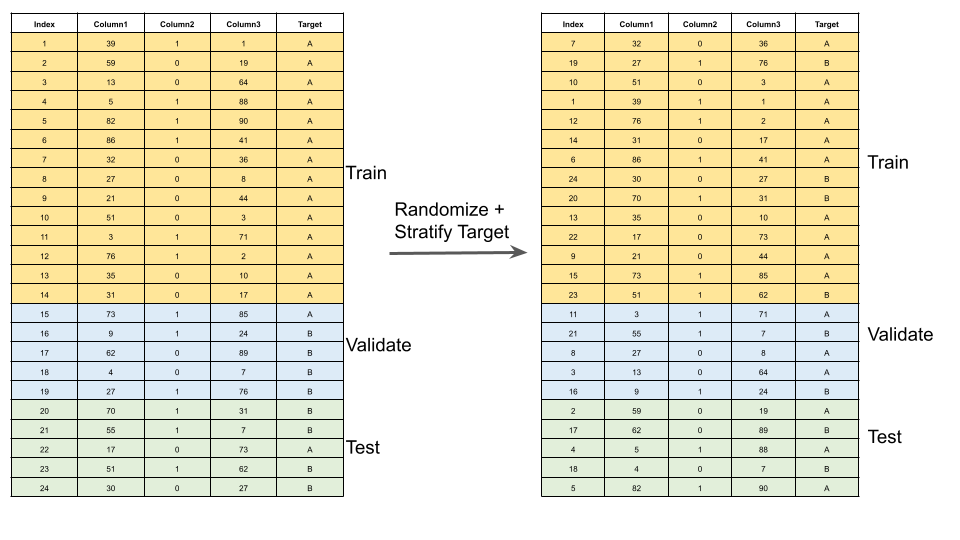

Sklearn allows us to split our data easily:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# import splitting functions


In [ ]:
#first split


In [ ]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Note: this is our first split. there is only train and test. we still need our second split for validate. 

In [ ]:
#second split


In [ ]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

- Train is now 60% of our data
- Validate is now 20% of our data
- Test is now 20% of our data

### Turn it into a function

In [ ]:
# def split_titanic(df):
#     '''
#     Takes in the titanic dataframe and return train, validate, test subset dataframes
#     '''
#     train, test = train_test_split(df,
#                                    test_size=.2, 
#                                    random_state=123, 
#                                    stratify=df.survived)
#     train, validate = train_test_split(train, 
#                                        test_size=.25, 
#                                        random_state=123, 
#                                        stratify=train.survived)
#     return train, validate, test

Test our new function!

In [ ]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

### We can create a function made of both of our prepare functions!

In [ ]:
# Another function? YES PLZ!
# def prep_titanic_data(df):
#     '''
#     The ultimate dishwasher - clean data and split my titanic
#     '''
#     df = clean_titanic(df)
#     train, validate, test = split_titanic(df)
    
#     return train, validate, test

In [ ]:
# Run final prepare function and validate what that the function is working properly.


In [ ]:
print(f'Clean df: {df_fresh.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

All three functions that we created can be will be added to a .py file!
- clean_titanic
- split_titanic
- prep_titanic

We end our prepare phase with a prepare.py with all our functions

## Option for Missing Values: Impute


Impute: Assign a value to something by inference


Strategies for imputing:
- fill with 0
- fill with the average
- fill with the median
- fill with subgroup mean
- fill with most frequent value
- build a model to predict missing values



We will use `sklearn.imputer.SimpleImputer` to do this.  

0. Split data into train/validate/test
1. Create the imputer object
    - use determined strategy for impyting
2. Fit to train 
    - used determined strategy to calculated imputed value
    - updates imputer object
3. Transform train/validate/test
    - fill missing values with imputed value on our train, validate, and test df

### lets revisit our initial titanic dataset & fill in the nulls from embark_town

In [ ]:
#get fresh titanic data


In [ ]:
#look at nulls of embark_town


#### Step 0. Split data into train/validate/test

In [ ]:
#split the data


In [ ]:
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')

#### Step 1. Create the imputer object

Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

In [ ]:
# import imputing functions


In [ ]:
# SimpleImputer?

In [ ]:
# Define the thing using (strategy = 'most_frequent')


#### Step 2. Fit to train 

This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column, in the training set only

In [ ]:
# fit the thing using imputer.fit()


It will store that value in the imputer object. We can call different attributes to see what is stored in the importer. 

#### Step 3. Transform train/validate/test

Use our imputer object to `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [ ]:
# Use the thing using imputer.transform()


In [ ]:
# Validate that there are no longer any Null values in embark_town.
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')